<a href="https://colab.research.google.com/github/gaheehan/NLP/blob/main/KoBERT%EB%A1%9C_%EB%8B%A4%EC%A4%91_%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 노년층 대상 감성 분류 모델 데이터 세트를 이용하여 실습해보기

 처음엔 https://wikidocs.net/94600를 참고해 모델을 만들어 실습하려했으나, 참고하던 자료는 이진분류고 우리가 실습하는 모델 데이터의 클래스는 6가지인 다중분류라 적용하기가 어려웠다. https://velog.io/@seolini43/KOBERT%EB%A1%9C-%EB%8B%A4%EC%A4%91-%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8-%EB%A7%8C%EB%93%A4%EA%B8%B0-%ED%8C%8C%EC%9D%B4%EC%8D%ACColab 를 참고하여 다시 만들어 보았다.


# KoBERT란?
 KoBERT는 SKTBrain에서 공개한 기계번역 모델.
 BERT를 기반으로 하는 대화엔진 개발을 위해 KoBERT 학습을 시작하게 되었다고 한다. 이처럼 KoBERT는 BERT 모델에서 한국어 데이터를 추가로 학습시킨 모델로, 한국어 위키에서 5백만개의 문장과 54백만개의 단어를 학습시킨 모델이다. 따라서 한국어 데이터에 대해서도 높은 정확도를 낼 수 있다고 한다.

# Project Description

앞서 언급했듯이 처음엔 Mecab으로 형태소를 분류하고 GRU 모델로 감성 분류를 하려하였으나, 참고자료와 달리 다중분류였기 때문에 새로 찾은 KoBERT를 이용한 프로젝트를 진행하겠다. 노년층의 인공지능 스피커와의 대화 문장을 6가지의 감정('불안', '기쁨', '분노', '슬픔', '상처', '당황')으로 분류하는 모델을 학습시키는 프로젝트를 할 것이다.

코드는 velog.io/@seolini43님의 [파이썬]KoBERT로 다중 분류 모델 만들기 - 코드를 바탕으로 작성하였다. 

학습 데이터는 AIHUB에서 오픈되어 있는 '노년층 대상 감성 분류 모델 데이터셋'을 다운받아 사용하였다. 해당 데이터는 약 10150개의 문장으로, 각 문장에 대해 6가지의 감정 ('불안', '기쁨', '분노', '슬픔', '상처', '당황')에 대해 레이블링이 수행되어 있다. 아래 이미지는 데이터의 일부분을 캡쳐한 것이다. 
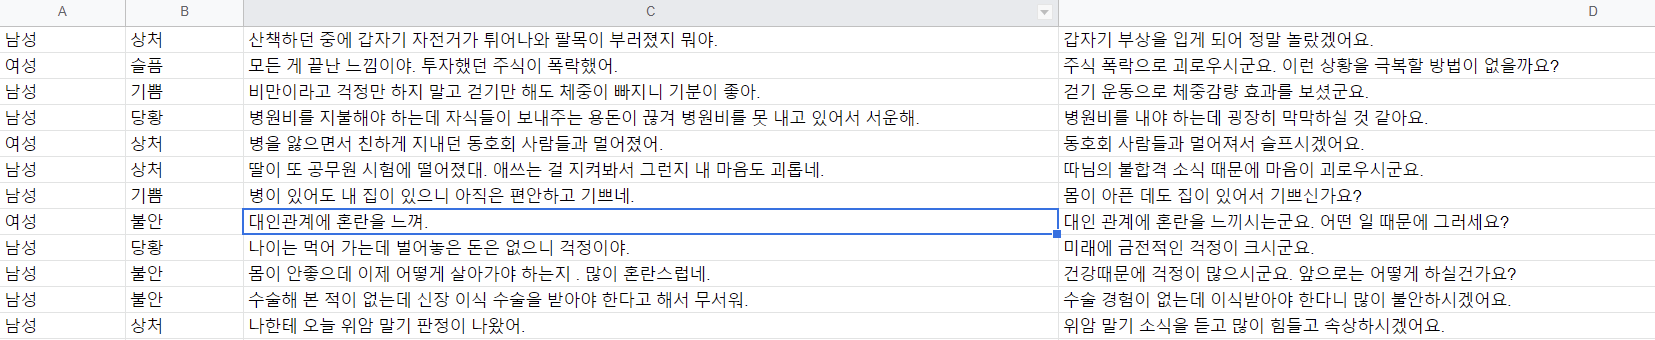

## 1.Colab 환경 설정
필요한 라이브러리와 모듈을 설치, 깃허브에서 KoBERT 파일을 로드한다.

In [ ]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install transformers==3.0.2
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.1 MB 1.3 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 344 kB 4.0 MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp37-cp37m-linux_x86_64.whl size=595757 sha256=551b8a5906e41466b4c69fdd3a4f9f9fdf9a0e659dd7918ec5353e99859e595e
  Stored in directory: /root/.cache/pip/wheels/be/b4/06/7f3fdfaf707e6b5e98b79c041e023acffbe395d78a527eae00
Successfully built gluonnlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 8.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg

In [ ]:
#깃허브에서 KoBERT 파일 로드
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-mxv6vtzz
  Running command git clone -q 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-mxv6vtzz
     |████████████████████████████████| 129 kB 9.3 MB/s 
     |████████████████████████████████| 54.7 MB 39 kB/s 
     |████████████████████████████████| 4.5 MB 54.3 MB/s 
     |████████████████████████████████| 1.2 MB 62.1 MB/s 
     |██████████████████████████████▎ | 834.1 MB 1.2 MB/s eta 0:00:39tcmalloc: large alloc 1147494400 bytes == 0x391d4000 @  0x7f4838ead615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |████████████████████████████████| 881.9 MB 1

In [ ]:
#깃허브에서 KoBERT 파일 로드
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-jiqon01r
  Running command git clone -q 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-jiqon01r


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook

In [ ]:
#kobert
from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

#transformers
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [ ]:
#GPU 사용
device = torch.device("cuda:0")

In [ ]:
#BERT 모델, Vocabulary 불러오기
bertmodel, vocab = get_pytorch_kobert_model()

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


## 2. 데이터에 대한 이해와 전처리
필요한 모듈을 설치하고 나면 이제 한국어 대화 데이터셋을 가져와야 한다. AIHUB에서 필요한 데이터를 파일로 다운받았고, 구글 드라이브에 업로드해놓았다. 이제 코랩과 구글 드라이브를 연동해서 로드하면 된다.

In [ ]:
#구글드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 데이터 불러오기

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/emotionClassification_train/train.csv')
df.head()

,성별,감정_대분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4
0,남성,불안,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,약 종류가 많아 번거로우시겠어요.,건강할 때 관리 좀 잘할걸 하는 생각이 들더라고.,현재 상황에서 변화를 주기 위해 어떻게 하면 될까요?,약을 잘 챙겨 먹고 나을 수 있도록 노력해야지.,약을 잘 챙겨 먹어 건강해지시길 바랄게요.,NaN,NaN
1,남성,기쁨,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,재취업 후 첫 월급이라 정말 기쁘시겠어요.,퇴직 후 다시는 돈을 못 벌 줄 알았는데 이렇게 월급으로 가족에게 맛있는 밥을 살 ...,이 기분을 유지하려면 어떻게 해야 할까요?,회사생활을 열심히 해서 계속 월급을 받을거야!,계속 원하시는 대로 회사생활이 이어지길 바랄게요.,NaN,NaN
2,여성,기쁨,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,기분 좋으시겠어요. 앞으로는 어떻게 하실 생각이신가요?,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶어.,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶으시군요.,NaN,NaN,NaN,NaN
3,남성,분노,이제 돈이라면 지긋지긋해.,무슨 일 있으셨나요?,나이가 예순이 넘으니 돈이 나갈 데도 많고 힘드네.,돈이 나갈 곳이 많아 재정적으로 힘드시군요.,NaN,NaN,NaN,NaN
4,여성,슬픔,친구 때문에 눈물 나.,친구 때문에 눈물이 나시는군요. 무슨 일이세요?,내 친구가 나한테 거짓말했어.,거짓말한 친구 때문에 속상하셨겠네요.,NaN,NaN,NaN,NaN


### 필요한 데이터만 추출하기

In [ ]:
df=df[['감정_대분류','사람문장1']]

In [ ]:
df

,감정_대분류,사람문장1
0,불안,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.
1,기쁨,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.
2,기쁨,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.
3,분노,이제 돈이라면 지긋지긋해.
4,슬픔,친구 때문에 눈물 나.
...,...,...
10145,슬픔,병원에서 친하게 지내던 환자가 암으로 죽어서 너무 슬퍼.
10146,상처,천식 때문에 가족들 두고 산에서 혼자 사는데 외롭네.
10147,분노,오늘 식당에서 서빙을 하는데 젊은 청년들이 반말하길래 기분이 나빠 나도 반말을 하며...
10148,상처,최 영감이 노인들에게 나를 이상한 사람으로 이야기해서 답답하고 억울해.


In [ ]:
print('전체 문장 개수 :',len(df))

전체 문장 개수 : 10150


각 열에 대해서 중복을 제외한 샘플의 수를 카운트합니다.

In [ ]:
df['감정_대분류'].nunique(),df['사람문장1'].nunique()

(6, 9787)

In [ ]:
df['감정_대분류'].unique()

array(['불안', '기쁨', '분노', '슬픔', '상처', '당황'], dtype=object)

In [ ]:
df.drop_duplicates(subset=['사람문장1'], inplace=True) # reviews 열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 :',len(df))

총 샘플의 수 : 9787


NULL 값 유무를 확인합니다.

In [ ]:
print(df.isnull().values.any())

False


감정_대분류열의 경우 ['불안', '기쁨', '분노', '슬픔', '상처', '당황'] 이라는 6가지 값을 가지고 있다. 사람문장1열에서 중복을 제외한 경우 9787개입니다. 현재 10150개의 문장이 존재하므로 이는 현재 갖고 있는 데이터에 중복인 샘플들이 있다는 의미이다. 중복인 샘플들을 제거해주었다.

### 각 class 라벨링 후 각 데이터셋이 ['sentence', 'class']의 형태로 바꾸어주기

In [ ]:
df.loc[(df['감정_대분류'] == "불안"), '감정_대분류'] = 0  #불안 => 0
df.loc[(df['감정_대분류'] == "기쁨"), '감정_대분류'] = 1  #기쁨 => 1
df.loc[(df['감정_대분류'] == "분노"), '감정_대분류'] = 2  #분노 => 2
df.loc[(df['감정_대분류'] == "슬픔"), '감정_대분류'] = 3  #슬픔 => 3
df.loc[(df['감정_대분류'] == "상처"), '감정_대분류'] = 4  #상처 => 4
df.loc[(df['감정_대분류'] == "당황"), '감정_대분류'] = 5  #당황 => 5

data_list = []
for q, label in zip(df['사람문장1'], df['감정_대분류'])  :
    data = []
    data.append(q)
    data.append(str(label))

    data_list.append(data)

In [ ]:
print(data_list[0])
print(data_list[1000])
print(data_list[2000])
print(data_list[3000])
print(data_list[4000])
print(data_list[5000])
print(data_list[-1])

['당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.', '0']
['요즘 매일이 무기력하고 힘들어서 병원에 갔더니 글쎄 만성피로라 그러네.', '4']
['동네 사람들이 다른 사람의 말만 듣고 오해해서 모두 나를 손가락질했어.', '5']
['돈을 잃은 걸 충당하려면 아내의 지갑에 손댈 수밖에 없겠네.', '2']
['암에 걸려서 당장 치료비가 필요한데 아들이 해고를 당해서 말할 수도 없고 불안해.', '0']
['건강에 나만 안달하고 있어.', '2']
['이렇게 좋은 운동 시설에서 경로 우대로 운동할 수 있다니 참 행운이야.', '1']


출력된 것을 보면 각 데이터셋이 ['sentence', 'class']의 형태로 이루어져 있음을 확인할 수 이고, 각 숫가 class로 잘 라벨링 되었음을 확인할 수 있다.

## 3.Train data & Test data

이제 기본적인 데이터셋이 준비가 되었다면, 모델에 학습시킬 train data와 모델을 평가할 test data로 나누어야 한다. Data를 나누는 것은 사이킷런에서 제공하는 train_test_split 라이브러리를 이용하며, 4:1 비율로 나누도록 하겠다.

In [ ]:
#train & test 데이터로 나누기
from sklearn.model_selection import train_test_split
                                                         
dataset_train, dataset_test = train_test_split(data_list, test_size=0.25, random_state=0)

print(len(dataset_train))
print(len(dataset_test))

7340
2447


## 4.KoBERT 입력 데이터로 만들기
데이터를 train data와 test data로 나누었다면 각 데이터가 KoBERT 모델의 입력으로 들어갈 수 있는 형태가 되도록 토큰화, 정수 인코딩, 패딩 등을 해주어야 한다. 예시 코드에 입력데이터의 형태가 되도록 해주는 클래스가 있어서 동일하게 코드를 작성해주었다.

In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

하이퍼 파라미터들을 조정. Batch size는 64, epochs는 10, learning rate는 5e-5로 설정해주었다. 사실 파라미터의 값은 정답이 없고 가장 좋은 성능을 내는 값을 찾아가는 것이 좋다. 하지만 난 그냥 예시 코드에 있는 값들을 동일하게 설정해주었다.

In [ ]:
# Setting parameters
max_len = 64
batch_size = 64
warmup_ratio = 0.1
num_epochs = 10
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

그리고 이제 버트토크나이저와 위에서 정의한 클래스를 적용해 토큰화와 패딩을 해준다.

In [ ]:
#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

data_train = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)

using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
data_train[0]

(array([   2, 3489, 5101, 6668,  517,   54,    3,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int32),
 array(7, dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int32),
 0)

출력값들을 보면 3개의 array가 출력되는데, 첫 번째는 패딩된 시퀀스, 두 번째는 길이와 타입에 대한 내용, 세 번재는 어텐션 마스크 시퀀스이다. 어텐션 마스크는 지난 BERT 프로젝트 글에서도 설명했었는데, BERT에 데이터가 입력되었을 때 어텐션 함수가 적용되어 연산이 된다. 이때 1로 패딩된 값들은 연산할 필요가 없기 때문에 연산을 하지 않아도 된다고 알려주는 데이터가 있어야 하는데 그게 바로 어텐션 마스크 시퀀스인 것이다. 이렇게 BERT나 KoBERT에는 어텐션 마스크 데이터도 함께 입력되어야 한다

이제 마지막으로 아래 코드를 실행하여 torch 형식의 dataset을 만들어준다.

In [ ]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=10)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=10)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


## 5.KoBERT 학습모델 만들기
학습시킬 KoBERT 모델을 만들어야 하는데, 아래 코드에서 다중분류할 클래스 수 만큼 num_classes 변수를 수정해주어야 한다. 이번 프로젝트에서는 6가지의 class를 분류하기 때문에 6로 입력해주었다

In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=6,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
#BERT 모델 불러오기
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)

#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc
    
train_dataloader

## 6.KoBERT 모델 학습시키기
학습 데이터셋과 학습 모델 준비가 다 끝났다면 이제 아래 코드 실행을 통해 KoBERT 모델을 학습시켜준다.

In [ ]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/115 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 1.7001873254776 train acc 0.28125
epoch 1 train acc 0.6388092885375495


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/39 [00:00<?, ?it/s]

epoch 1 test acc 0.6371794871794872


  0%|          | 0/115 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.6042356491088867 train acc 0.859375
epoch 2 train acc 0.7758399209486165


  0%|          | 0/39 [00:00<?, ?it/s]

epoch 2 test acc 0.6310630341880342


  0%|          | 0/115 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.5539374947547913 train acc 0.796875
epoch 3 train acc 0.8232460474308301


  0%|          | 0/39 [00:00<?, ?it/s]

epoch 3 test acc 0.6178418803418804


  0%|          | 0/115 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.3071853518486023 train acc 0.921875
epoch 4 train acc 0.8675395256916996


  0%|          | 0/39 [00:00<?, ?it/s]

epoch 4 test acc 0.6318643162393163


  0%|          | 0/115 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.2580276429653168 train acc 0.90625
epoch 5 train acc 0.9055212450592885


  0%|          | 0/39 [00:00<?, ?it/s]

epoch 5 test acc 0.6294604700854701


  0%|          | 0/115 [00:00<?, ?it/s]

epoch 6 batch id 1 loss 0.24686923623085022 train acc 0.921875
epoch 6 train acc 0.9216032608695652


  0%|          | 0/39 [00:00<?, ?it/s]

epoch 6 test acc 0.6342681623931624


  0%|          | 0/115 [00:00<?, ?it/s]

epoch 7 batch id 1 loss 0.05437854304909706 train acc 1.0
epoch 7 train acc 0.9509510869565218


  0%|          | 0/39 [00:00<?, ?it/s]

epoch 7 test acc 0.6333600427350426


  0%|          | 0/115 [00:00<?, ?it/s]

epoch 8 batch id 1 loss 0.0791110247373581 train acc 0.984375
epoch 8 train acc 0.9657608695652173


  0%|          | 0/39 [00:00<?, ?it/s]

epoch 8 test acc 0.6325587606837606


  0%|          | 0/115 [00:00<?, ?it/s]

epoch 9 batch id 1 loss 0.0365055650472641 train acc 1.0
epoch 9 train acc 0.9778532608695653


  0%|          | 0/39 [00:00<?, ?it/s]

epoch 9 test acc 0.6358707264957265


  0%|          | 0/115 [00:00<?, ?it/s]

epoch 10 batch id 1 loss 0.023509373888373375 train acc 1.0
epoch 10 train acc 0.9808423913043478


  0%|          | 0/39 [00:00<?, ?it/s]

epoch 10 test acc 0.6362713675213676


출력된 정확도를 보면 학습 데이터에 대해선 0.98로 정확도가 아주 높게 나왔는데, 테스트 데이터에 대해선 정확도가 0.64로 많이 학습 데이터에 비해 정확도가 많이 떨어졌다

## 7.새로운 문장 테스트
새로운 문장을 테스트 할 때, 입력되는 문장을 KoBERT의 입력 형식으로 바꿔주는 코드를 작성해주어야 한다. 아래 코드를 작성하여 토큰화, 패딩, 텐서를 바꿔주고 예측을 하는 'predict' 함수를 만들어 주었다.

In [ ]:
#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

def predict(predict_sentence):

    data = [predict_sentence, '0']
    dataset_another = [data]

    another_test = BERTDataset(dataset_another, 0, 1, tok, max_len, True, False)
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)
    
    model.eval()

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length= valid_length
        label = label.long().to(device)

        out = model(token_ids, valid_length, segment_ids)


        test_eval=[]
        for i in out:
            logits=i
            logits = logits.detach().cpu().numpy()

            if np.argmax(logits) == 0:
                test_eval.append("불안이")
            elif np.argmax(logits) == 1:
                test_eval.append("기쁨이")
            elif np.argmax(logits) == 2:
                test_eval.append("분노가")
            elif np.argmax(logits) == 3:
                test_eval.append("슬픔이")
            elif np.argmax(logits) == 4:
                test_eval.append("상처가")
            elif np.argmax(logits) == 5:
                test_eval.append("당황")

        print(">> 입력하신 내용에서 " + test_eval[0] + " 느껴집니다.")

using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


이제 질문을 무한반복하기 위한 코드를 작성

In [ ]:
#질문 무한반복하기! 0 입력시 종료
end = 1
while end == 1 :
    sentence = input("하고싶은 말을 입력해주세요 : ")
    predict(sentence)
    print("\n")
    if sentence == "0" :
      break

print("프로그램을 종료합니다...")     
    

하고싶은 말을 입력해주세요 : 고양이 귀여워
>> 입력하신 내용에서 기쁨이 느껴집니다.


하고싶은 말을 입력해주세요 : 날씨가 우중충해서 우울해
>> 입력하신 내용에서 슬픔이 느껴집니다.


하고싶은 말을 입력해주세요 : 너무 짜증나
>> 입력하신 내용에서 분노가 느껴집니다.


하고싶은 말을 입력해주세요 : 친구가 아파서 속상해
>> 입력하신 내용에서 슬픔이 느껴집니다.


하고싶은 말을 입력해주세요 : 요즘 친구가 내 연락을 받지않아..
>> 입력하신 내용에서 분노가 느껴집니다.


하고싶은 말을 입력해주세요 : 친구가 날 배신했어
>> 입력하신 내용에서 상처가 느껴집니다.


하고싶은 말을 입력해주세요 : 모르는 번호로 전화왔는데 아는 목소리라 당황했네
>> 입력하신 내용에서 당황 느껴집니다.


하고싶은 말을 입력해주세요 : 0
>> 입력하신 내용에서 슬픔이 느껴집니다.


프로그램을 종료합니다...


최대한 다 다른 감정들이 출력될 수 있도록 문장을 입력해보았다.
그 결과 test dataset의 정확도에 대한 우려와는 다르게 생각보다 예측을 잘 해주었다! 100% 정확하다고는 할 수 없지만 대충 결이 비슷한 감정으로 출력되었다.

## Result

KoBERT를 이용하여 한국어 대화 문장을 6가지의 감정으로 분류하는 모델을 만들고 학습시켜보았다.

Test datasets에 대한 정확도가 높지 않았지만 새로운 문장을 입력하니 의외로 감정이 잘 예측되었다.

당황을 표현하는 문장을 잘 몰라서 당황하였다;;

분노와 상처같은 감정은 미묘하게 차이나는 감정이라 예측이 잘 되지 않은 것 같다.

감정 대화 데이터셋을 보면 레이블링이 완벽하게 되어있지 않다. 수정을 한다면 예측률이 더 높은 모델을 만들 수 있을 것 같다.

 참조: 
*    https://wikidocs.net/94600 

*   https://velog.io/@seolini43/KOBERT%EB%A1%9C-%EB%8B%A4%EC%A4%91-%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8-%EB%A7%8C%EB%93%A4%EA%B8%B0-%ED%8C%8C%EC%9D%B4%EC%8D%ACColab


